In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string
import nltk
import warnings
%matplotlib inline

# To terminate Warnings.
warnings.filterwarnings("ignore")

#viz Style.
plt.style.use("seaborn")

In [2]:
train = pd.read_csv("train_E6oV3lV.csv")
test = pd.read_csv("test_tweets_anuFYb8.csv")

In [3]:
train.shape , test.shape

((31962, 3), (17197, 2))

In [4]:
train.head() , test.head()

(   id  label                                              tweet
 0   1      0   @user when a father is dysfunctional and is s...
 1   2      0  @user @user thanks for #lyft credit i can't us...
 2   3      0                                bihday your majesty
 3   4      0  #model   i love u take with u all the time in ...
 4   5      0             factsguide: society now    #motivation,
       id                                              tweet
 0  31963  #studiolife #aislife #requires #passion #dedic...
 1  31964   @user #white #supremacists want everyone to s...
 2  31965  safe ways to heal your #acne!!    #altwaystohe...
 3  31966  is the hp and the cursed child book up for res...
 4  31967    3rd #bihday to my amazing, hilarious #nephew...)

In [5]:
print(train.tail(),"\n")
print(test.tail())

          id  label                                              tweet
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow   

          id                                              tweet
17192  49155  thought factory: left-right polarisation! #tru...
17193  49156  feeling like a mermaid ð #hairflip #neverre...
17194  49157  #hillary #campaigned today in #ohio((omg)) &am...
17195  49158  happy, at work conference: right mindset leads...
17196  49159  my   song "so glad" free download!  #shoegaze ...


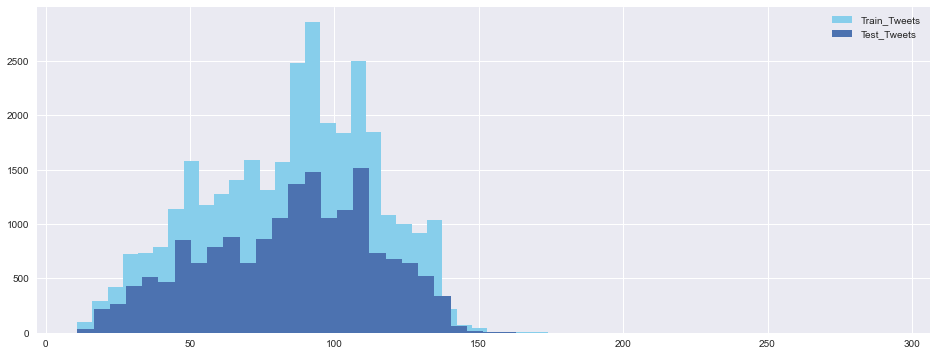

In [6]:
# Let’s view what’s the length of the Tweets in our Train and Test data.
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.figure(figsize=(16,6))
plt.hist(length_train , bins = 50 , label ="Train_Tweets",color = "skyblue")
plt.hist(length_test, bins = 50 , label = "Test_Tweets")
plt.legend()

In [7]:
# Selecting training labeled dataset of 31,962 tweets.
# For test dataset we need to get labels, we need to use sentimental analysis tools like VADER, ROBERTA, TEXT BLOB etc. We will do that later.
df = train
df.shape

(31962, 3)

In [8]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [9]:
# Defining a function to remove corresponding pattern in the input text.
def remove_pattern(input_text,pattern):
    r = re.findall(pattern,input_text)
    """It will find all the patterns in the input text"""
    for word in r:
        # Sub replace one or more matches with a string.
        input_text = re.sub(word,"",input_text)
    return input_text

In [10]:
# Remove twitter handles like "@user" and store it in new column is "clean_tweet".
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [11]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [12]:
# Remove Short Words.
# Here i am iterating through the string , so it will split all the word in a separate words , so if the word length is greater than 3 , it will add into string if not greater than it will ignore it.
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : " ".join([word for word in x.split() if len(word)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [13]:
# Individual Words Considered as tokens.
tokenized_tweet = df['clean_tweet'].apply(lambda x : x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [14]:
# Stem the words.
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence : [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [15]:
# Combine words into single sentence.
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

tokenized_tweet.head()

0    when father dysfunct selfish drag kid into dys...
1    thank #lyft credit caus they offer wheelchair ...
2                                  bihday your majesti
3                           #model love take with time
4                             factsguid societi #motiv
Name: clean_tweet, dtype: object

In [16]:
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


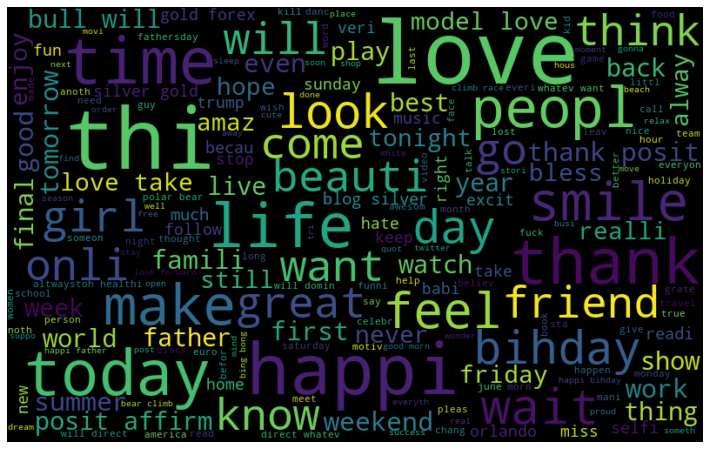

In [17]:
# It Will combine all sentences into a single string.
all_words = " ".join([sentence for sentence in df['clean_tweet']]) 

# visualize The Frequent Words.
wordcloud = WordCloud(width = 800 , height = 500 , random_state = 42 , max_font_size = 100).generate(all_words)

# plot the graph.
plt.figure(figsize = (16,8))
plt.imshow(wordcloud , interpolation = "bilinear")
plt.axis("off")
plt.show()

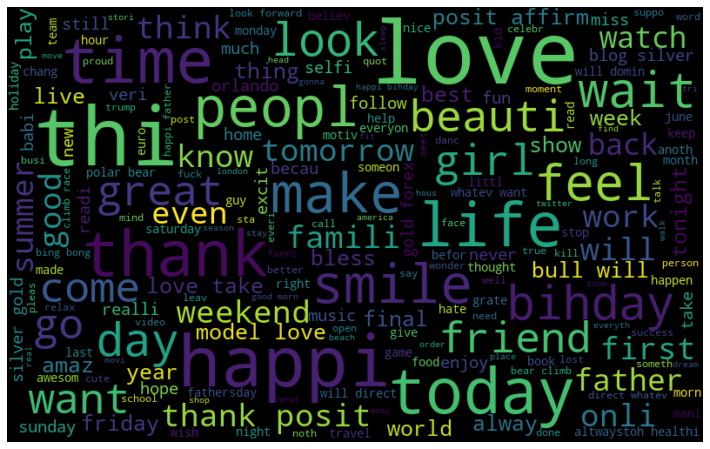

In [18]:
# Frequent Words Visualization For Positive Words.
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]]) 

# visualize The Frequent Words.
wordcloud = WordCloud(width = 800 , height = 500 , random_state = 42 , max_font_size = 100).generate(all_words)

# plot the graph.
plt.figure(figsize = (16,8))
plt.imshow(wordcloud , interpolation = "bilinear")
plt.axis("off")
plt.show()

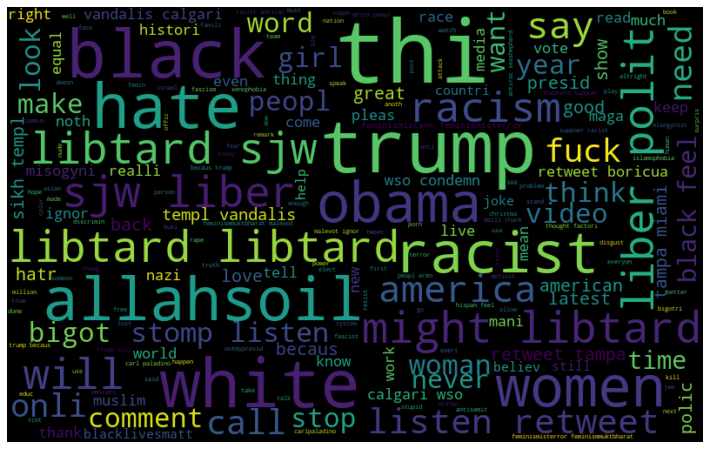

In [19]:
# Frequent Words Visualization For Negative Words.
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]]) 

# visualize The Frequent Words.
wordcloud = WordCloud(width = 800 , height = 500 , random_state = 42 , max_font_size = 100).generate(all_words)

# plot the graph.
plt.figure(figsize = (16,8))
plt.imshow(wordcloud , interpolation = "bilinear")
plt.axis("off")
plt.show()

In [20]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'
    # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
            
     # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)
        
          # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


In [21]:
# Extract the hashtag.
def hashtag_extract(tweets):
    hashtag = []
    # Loop Words In The tweet.
    for tweet in tweets:
        # The "r" in the beginning is making sure that the string is being treated as a "raw string".
        ht = re.findall(r"#(\w+)",tweet) # "+" one or more occurrences.
        hashtag.append(ht)
    return hashtag

In [22]:
# Extract hashtags from non racist/sexist tweets.
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# Extract hashtags from racist/sexist tweets.
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [23]:
# Nested list
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [24]:
# Make a nested list into a Unnest list.
ht_positive = sum(ht_positive,[])
ht_negative = sum(ht_negative,[])
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [25]:
# Use A dictionary from nltk to process the tweets.
freq = nltk.FreqDist(ht_positive)

# Convert this into a DataFrame.
d = pd.DataFrame({'Hashtag':list(freq.keys()),'Count':list(freq.values())})

d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


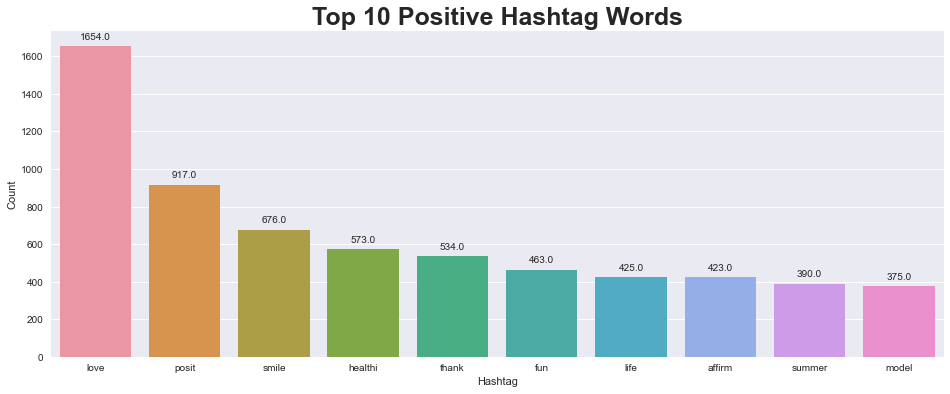

In [26]:
# Select top 10 hashtags.
d = d.nlargest(columns='Count',n=10)

# Plot the bar graph.
plt.figure(figsize=(16,6))
ax = sns.barplot(data=d,x="Hashtag",y="Count")
plt.title("Top 10 Positive Hashtag Words",fontweight="bold",fontsize=25)
add_value_labels(ax)
plt.show()

In [27]:
# Use A dictionary from nltk to process the tweets.
freq = nltk.FreqDist(ht_negative)

# Convert this into a DataFrame.
d = pd.DataFrame({'Hashtag':list(freq.keys()),'Count':list(freq.values())})

d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


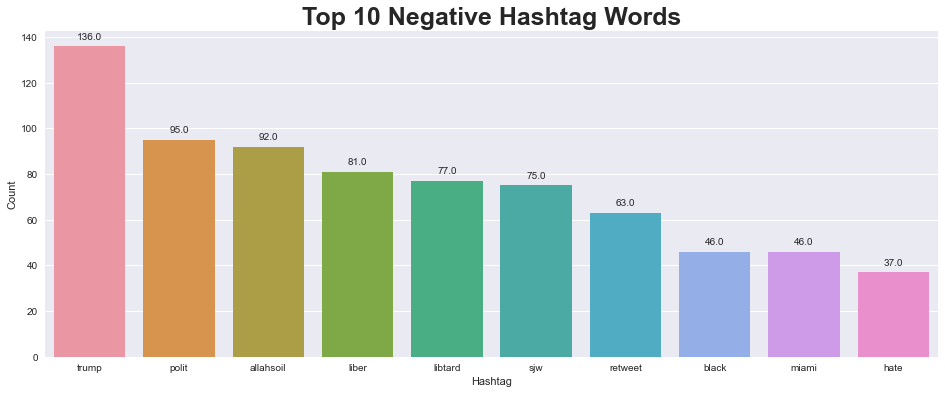

In [28]:
# Select top 10 hashtags.
d = d.nlargest(columns='Count',n=10)

# Plot the bar graph.
plt.figure(figsize=(16,6))
ax = sns.barplot(data=d,x="Hashtag",y="Count")
plt.title("Top 10 Negative Hashtag Words",fontweight="bold",fontsize=25)
add_value_labels(ax)
plt.show()

In [29]:
# Feature Engineering: Converting words into vectors or bag of words.
from sklearn.feature_extraction.text import CountVectorizer

# let's specify some hyper parameters w.r.t CountVectorizer , to get decent accuracy.
# If We don't define max_feauture , it will take all the features , but it will take so much time for training the model.
bow_vectorizer = CountVectorizer(max_df = .90 , min_df = 2 , max_features = 1000 , stop_words = "english")
bow  = bow_vectorizer.fit_transform(df['clean_tweet'])

In [30]:
# Split the input data into training and testing sets.
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(bow,df['label'],random_state=42,test_size=.25)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score , accuracy_score , precision_score , recall_score,classification_report,confusion_matrix

# create a logistic regression model.
model = LogisticRegression()
model.fit(x_train,y_train)

# Testing
pred = model.predict(x_test)

accuracy = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
f1 = f1_score(y_test,pred)
report = classification_report(y_test,pred)
matrix = confusion_matrix(y_test,pred)


# Print The values.
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1Score: {:.2f}'.format(f1))
print('classification report:\n',report)
print('confusion matrix:\n',matrix)

Accuracy: 0.95
Precision: 0.74
Recall: 0.38
F1Score: 0.50
classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      7432
           1       0.74      0.38      0.50       559

    accuracy                           0.95      7991
   macro avg       0.85      0.68      0.73      7991
weighted avg       0.94      0.95      0.94      7991

confusion matrix:
 [[7357   75]
 [ 349  210]]


In [32]:
# Use Probability To Get Output.
pred_prob = model.predict_proba(x_test)
# If Predection is Greater than or equal to 0.3 than 1 else 0.
pred = pred_prob[:,1] >=0.3
pred = pred.astype(np.int)

accuracy = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
f1 = f1_score(y_test,pred)
report = classification_report(y_test,pred)
matrix = confusion_matrix(y_test,pred)


# Print The predict values.
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1Score: {:.2f}'.format(f1))
print('classification report:\n',report)
print('confusion matrix:\n',matrix)

Accuracy: 0.94
Precision: 0.62
Recall: 0.50
F1Score: 0.55
classification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      7432
           1       0.62      0.50      0.55       559

    accuracy                           0.94      7991
   macro avg       0.79      0.74      0.76      7991
weighted avg       0.94      0.94      0.94      7991

confusion matrix:
 [[7256  176]
 [ 277  282]]


In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score , accuracy_score , precision_score , recall_score,classification_report,confusion_matrix

# create a Naive Baye model.
model = MultinomialNB()
model.fit(x_train,y_train)

accuracy = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
f1 = f1_score(y_test,pred)
report = classification_report(y_test,pred)
matrix = confusion_matrix(y_test,pred)

# Print The values.
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1Score: {:.2f}'.format(f1))
print('classification report:\n',report)
print('confusion matrix:\n',matrix)

Accuracy: 0.94
Precision: 0.62
Recall: 0.50
F1Score: 0.55
classification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      7432
           1       0.62      0.50      0.55       559

    accuracy                           0.94      7991
   macro avg       0.79      0.74      0.76      7991
weighted avg       0.94      0.94      0.94      7991

confusion matrix:
 [[7256  176]
 [ 277  282]]


In [34]:
# Use Probability To Get Output.
pred_prob = model.predict_proba(x_test)
# If Predection is Greater than or equal to 0.3 than 1 else 0.
pred = pred_prob[:,1] >=0.3
pred = pred.astype(np.int)

accuracy = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
f1 = f1_score(y_test,pred)
report = classification_report(y_test,pred)
matrix = confusion_matrix(y_test,pred)


# Print The predict values.
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1Score: {:.2f}'.format(f1))
print('classification report:\n',report)
print('confusion matrix:\n',matrix)

Accuracy: 0.92
Precision: 0.44
Recall: 0.61
F1Score: 0.51
classification report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      7432
           1       0.44      0.61      0.51       559

    accuracy                           0.92      7991
   macro avg       0.71      0.78      0.73      7991
weighted avg       0.93      0.92      0.92      7991

confusion matrix:
 [[6999  433]
 [ 217  342]]
